# Modeling the conformity model with migration

---



**Prepared by:** *Salma Es-sbih*

In [1]:
import numpy as np
import pandas as pd
import copy
# import random
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
# random.seed(10)


Plotting function 

In [2]:
#As you recommended, I've modified the plotting function
def plot_multiple_runs2(data_model):
  # Form a facetgrid using columns with a hue
  sea = sns.FacetGrid(data_model, col = "location", sharex =True, sharey = True, hue = "run")

  # map the above form facetgrid with some attributes
  sea.map(sns.lineplot, "generation", "p")

  # adding legend
  sea.add_legend()
  #code credits: https://www.geeksforgeeks.org/multi-plot-grid-in-seaborn/#:~:text=In%20Seaborn%2C%20we%20will%20plot,with%20the%20help%20of%20matplotlib.&text=data%3A%20Tidy%20dataframe%20where%20each,each%20row%20is%20an%20observation.


Stochastic model

In [22]:
def conformity_migration(N,p_A,m, t_max,r_max): # <------------ 

  df = pd.DataFrame(columns=['generation', 'p','location', 'run'])
  #Initialize the list that stores the final locations of agents by the end of the code to print graphs of each location seperately 

  for r in range(0,r_max):
    groups = []
    generation = []
    proba_a = []
    #Initialize the population and the outputat each run
    population = {i:np.random.choice(['A','B'],1,p=[p_A,1-p_A])[0] for i in range(0,N)}
    
    # create agent population
    agents = [i for i in range(0,N)]
    # manually assign agents to AA, BB, and CC locations
    location = {i:'AA' for i in agents[0:int(N/3)]}
    location.update({i:'BB' for i in agents[int(N/3):int((2*N)/3)]})
    location.update({i:'CC' for i in agents[int((2*N)/3):N]})
    
    
    for loc in np.unique(np.array(list(location.values()))):
        # generation.append(t)
        #Conformity outside the agents for loop
        #Get the agents in the location selected by the loop
        items = [i for i in location.keys() if location[i]== loc]
        #Create a subpopulation with these agents
        subpop = {i: population[i] for i in items}
        #start with the generation 
        for t in range(0,t_max):
          # np.random.seed(t)
          #agens migrate at each generation
          for ag in agents:
            # Does an agent migrate? Determined by probability of m
            migrate = np.random.choice([True,False],1,p=[m,1-m])
            #if true the agent migrates to a new location
            if migrate == True:
              # get current location of agent
              current_location = location[ag]
              # choose a new location from the set of possible locations (that is not the current location)
              new_locations = list(set([i for i in location.values() if i != current_location]))
              # randomly choose from new_locations
              location_update = np.random.choice(new_locations)
              # update agent's value with their new location
              location.update({ag:location_update})
      
           #Add their location to the groups' list (will look like this at the end ['AA',...,'BB',...,'CC',...])
           # groups.extend([loc for i in range(len(subpop))])
           #Create three demonstrators with a randomly-generated set of traits from the selected location
          demonstrators = {i:np.random.choice(np.array(list(subpop.values())),len(subpop)) for i in range(0,3)}
          #D > 0 entails conformity (A increases if its frequency is p > 1/2), D < 0 entails anticonformity, D = 0 entails random copying, and −1 < D < 1. 
          # D = np.random.uniform(0,1)
          D =  np.random.choice([np.random.uniform(-1.99,0),np.random.uniform(0,0.99)],1,p = [(1/3),(2/3)])[0]
          prob_majority = np.random.choice([True,False],len(subpop),p=[(2/3 + D/3), 1-(2/3 + D/3)])
          prob_minority = np.random.choice([True,False],len(subpop),p=[(1/3 - D/3), 1-(1/3 - D/3)])
          #When all demonstrators have A, we set to A
          #When no demonstrators have A, we set to B
          #When two out of three demonstrators have A, we set to A with probability 2/3 + D/3 and B otherwise
          #When one out of three demonstrators have A, we set to A with probability 1/3 - D/3 and B otherwise

          for i in range(len(subpop)):
            dem_list = [demonstrators[0][i], demonstrators[1][i], demonstrators[2][i]]
            if dem_list.count('A') == 3:
              subpop.update({i:'A'})
            elif dem_list.count('A') == 0:
              subpop.update({i:'B'})
            if dem_list.count('A') == 2 and prob_majority[i]==True:
              subpop.update({i:'A'})
            elif dem_list.count('A') == 2 and prob_majority[i]==False:
              subpop.update({i:'B'})
            if dem_list.count('A') == 1 and prob_minority[i]==True:
              subpop.update({i:'A'})
            elif dem_list.count('A') == 1 and prob_minority[i]==False:
              subpop.update({i:'B'})

          #outside the agents too    
          total_As = np.sum(np.array([value == 'A' for value in subpop.values()]))
          generation.append(t)  
          groups.append(loc)
          proba_a.append(total_As/int(len(subpop)))
        
          

    run_list = [r for i in range(0,3*t_max)]
    dff = pd.DataFrame({'generation':generation,'p':proba_a,'location':groups,'run':run_list})
    # a = pd.DataFrame(zip(generation,proba_a,groups,run_list), columns=['generation','p','location','run'])
    df = df.append(dff,ignore_index=True)
  return df

#code credits: Dr. James winters https://github.com/j-winters 

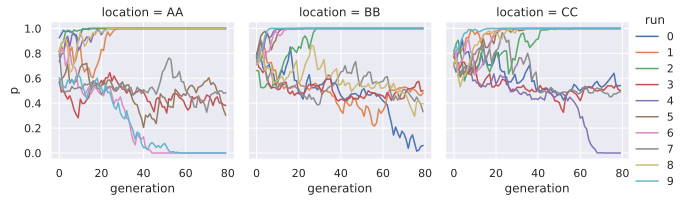

In [15]:
data_model = conformity_migration(N=1000, p_A=0.75,m = 0, t_max=80, r_max=10)
plot_multiple_runs2(data_model=data_model)

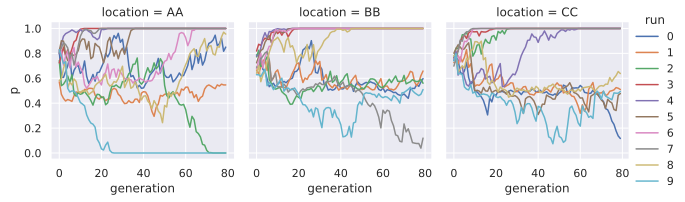

In [17]:
data_model = conformity_migration(N=1000, p_A=0.75,m = 0.5, t_max=80, r_max=10)
plot_multiple_runs2(data_model=data_model)

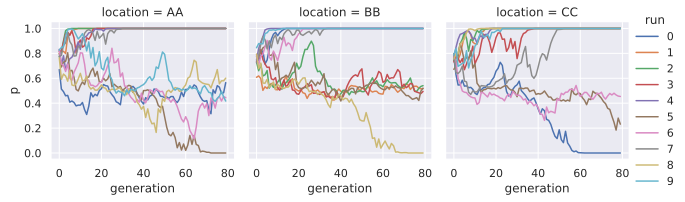

In [16]:
data_model = conformity_migration(N=1000, p_A=0.75,m = 1, t_max=80, r_max=10)
plot_multiple_runs2(data_model=data_model)

When we increase the number of runs

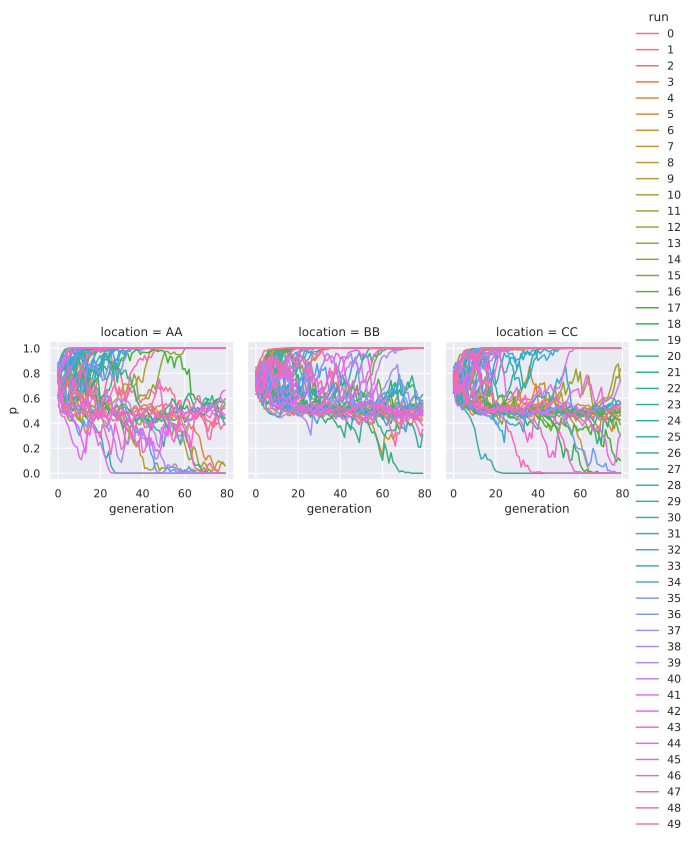

In [24]:
data_model = conformity_migration(N=1000, p_A=0.75,m = 0.5, t_max=80, r_max=50)
plot_multiple_runs2(data_model=data_model)

Deterministic model

In [3]:
#Version 2 of the function with a fixed D
def conformity_migration_dfixed(N,p_A,m,D, t_max,r_max): # <------------ 

  df = pd.DataFrame(columns=['generation', 'p','location', 'run'])
  #Initialize the list that stores the final locations of agents by the end of the code to print graphs of each location seperately 

  for r in range(0,r_max):
    groups = []
    generation = []
    proba_a = []
    #Initialize the population and the outputat each run
    population = {i:np.random.choice(['A','B'],1,p=[p_A,1-p_A])[0] for i in range(0,N)}
    
    # create agent population
    agents = [i for i in range(0,N)]
    # manually assign agents to AA, BB, and CC locations
    location = {i:'AA' for i in agents[0:int(N/3)]}
    location.update({i:'BB' for i in agents[int(N/3):int((2*N)/3)]})
    location.update({i:'CC' for i in agents[int((2*N)/3):N]})
    
    
    for loc in np.unique(np.array(list(location.values()))):
        # generation.append(t)
        #Conformity outside the agents for loop
        #Get the agents in the location selected by the loop
        items = [i for i in location.keys() if location[i]== loc]
        #Create a subpopulation with these agents
        subpop = {i: population[i] for i in items}
        #start with the generation 
        for t in range(0,t_max):
          # np.random.seed(t)
          #agens migrate at each generation
          for ag in agents:
            # Does an agent migrate? Determined by probability of m
            migrate = np.random.choice([True,False],1,p=[m,1-m])
            #if true the agent migrates to a new location
            if migrate == True:
              # get current location of agent
              current_location = location[ag]
              # choose a new location from the set of possible locations (that is not the current location)
              new_locations = list(set([i for i in location.values() if i != current_location]))
              # randomly choose from new_locations
              location_update = np.random.choice(new_locations)
              # update agent's value with their new location
              location.update({ag:location_update})
      
           #Add their location to the groups' list (will look like this at the end ['AA',...,'BB',...,'CC',...])
           # groups.extend([loc for i in range(len(subpop))])
           #Create three demonstrators with a randomly-generated set of traits from the selected location
          demonstrators = {i:np.random.choice(np.array(list(subpop.values())),len(subpop)) for i in range(0,3)}
          prob_majority = np.random.choice([True,False],len(subpop),p=[(2/3 + D/3), 1-(2/3 + D/3)])
          prob_minority = np.random.choice([True,False],len(subpop),p=[(1/3 - D/3), 1-(1/3 - D/3)])
          #When all demonstrators have A, we set to A
          #When no demonstrators have A, we set to B
          #When two out of three demonstrators have A, we set to A with probability 2/3 + D/3 and B otherwise
          #When one out of three demonstrators have A, we set to A with probability 1/3 - D/3 and B otherwise

          for i in range(len(subpop)):
            dem_list = [demonstrators[0][i], demonstrators[1][i], demonstrators[2][i]]
            if dem_list.count('A') == 3:
              subpop.update({i:'A'})
            elif dem_list.count('A') == 0:
              subpop.update({i:'B'})
            if dem_list.count('A') == 2 and prob_majority[i]==True:
              subpop.update({i:'A'})
            elif dem_list.count('A') == 2 and prob_majority[i]==False:
              subpop.update({i:'B'})
            if dem_list.count('A') == 1 and prob_minority[i]==True:
              subpop.update({i:'A'})
            elif dem_list.count('A') == 1 and prob_minority[i]==False:
              subpop.update({i:'B'})

          #outside the agents too    
          total_As = np.sum(np.array([value == 'A' for value in subpop.values()]))
          generation.append(t)  
          groups.append(loc)
          proba_a.append(total_As/int(len(subpop)))
        
          

    run_list = [r for i in range(0,3*t_max)]
    dff = pd.DataFrame({'generation':generation,'p':proba_a,'location':groups,'run':run_list})
    # a = pd.DataFrame(zip(generation,proba_a,groups,run_list), columns=['generation','p','location','run'])
    df = df.append(dff,ignore_index=True)
  return df

#code credits: Dr. James winters https://github.com/j-winters 

Random copying

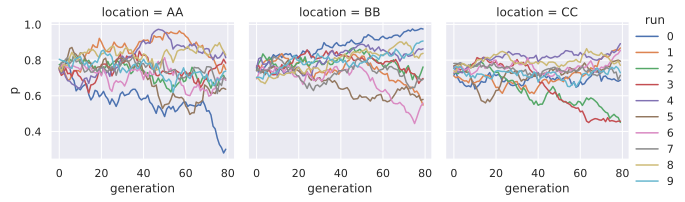

In [4]:
data_model = conformity_migration_dfixed(N=1000, p_A=0.75,m = 0, D = 0, t_max=80, r_max=10)
plot_multiple_runs2(data_model=data_model)

Conformist copying

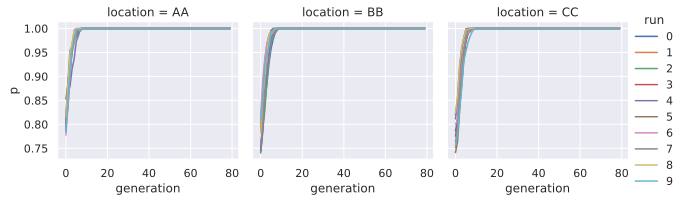

In [5]:
data_model = conformity_migration_dfixed(N=1000, p_A=0.75,m = 0, D = 0.6, t_max=80, r_max=10)
plot_multiple_runs2(data_model=data_model)

Conformist copying with migration

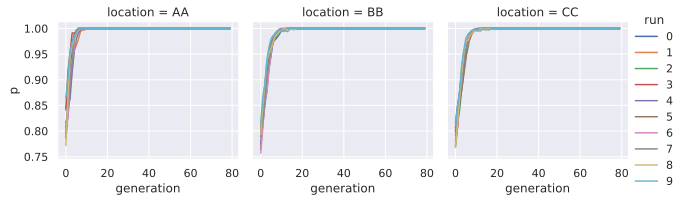

In [7]:
data_model = conformity_migration_dfixed(N=1000, p_A=0.75,m = 0.6, D = 0.6, t_max=80, r_max=10)
plot_multiple_runs2(data_model=data_model)